In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


<div style="width:100%;text-align: center;"> 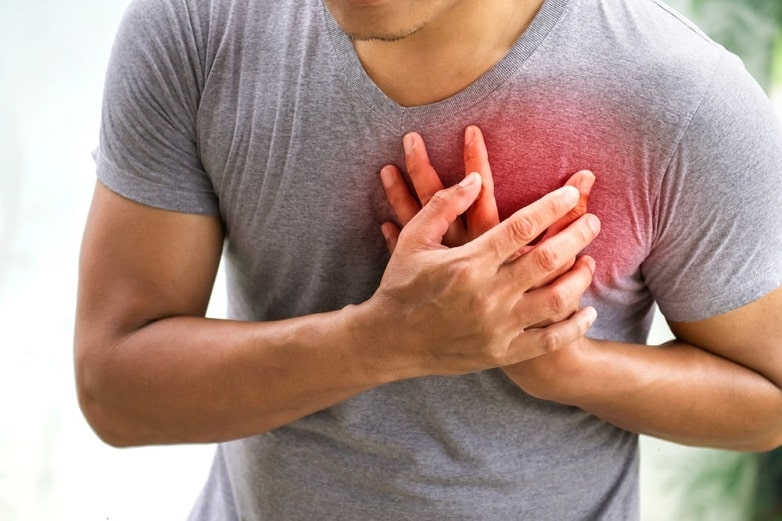


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#045E6D;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Table Of Content
</p>
</div>

<ol style= "color:#137667;
            font-size:22px;">
    <li> Import librarries</li>
    <li> Read the dataset</li>
    <li> Get information about data</li>
    <li> Data cleaning</li>
    <li> Data visualization & getting analysis</li>
    <li> Final report</li>

</ol>



----------
<p style="padding: 10px;
          color:white;
          background-color:#045E6D;
          font-size:200%;
          border-radius:5px;
          font-family:Verdana;
          display:fill;
          letter-spacing:0.5px;" >
                      Import librarries
</p>




In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

------------------

<p style="padding: 10px;
          color:white;
          background-color:#045E6D;
          font-size:200%;
          border-radius:5px;
          font-family:Verdana;
          display:fill;
          letter-spacing:0.5px;" >
                      Read dataset
</p>


In [3]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

-----------------

<p style="padding: 10px;
          color:white;
          background-color:#045E6D;
          font-size:200%;
          border-radius:5px;
          font-family:Verdana;
          display:fill;
          letter-spacing:0.5px;" >
                      Get information about data
</p>


In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


-------------------------------
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
about columns
</p>
</div>


<ul style= "color:#137667;
            font-size:18px;">
    <li> cp : Chest Pain type</li>
    <li> trtbps : resting blood pressure (in mm Hg)</li>
    <li> fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li> chol : cholestoral in mg/dl fetched via BMI sensor</li>
    <li> rest_ecg : resting electrocardiographic results</li>
    <li> thalachh : maximum heart rate achieved</li>
    <li> exng : exercise induced angina (1 = yes; 0 = no)</li>
    <li> oldpeak : Previous peak</li>
    <li> slp : Slope </li>
    <li> caa : number of major vessels (0-4)</li>
    <li> thall : Thal rate</li>
    <li> output : Target variable</li>
</ul>



-------
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Statistics for columns
</p>
</div>

In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


------


<p style="padding: 10px;
          color:white;
          background-color:#045E6D;
          font-size:200%;
          border-radius:5px;
          font-family:Verdana;
          display:fill;
          letter-spacing:0.5px;" >
                     Data cleaning
</p>


* Null data
* Remove duplicates


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Null data
</p>
</div>


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<p style="color:#E46161;
          font-size:22px;"> -> no null data </p>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Remove duplicates
</p>
</div>


In [9]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df.drop_duplicates(inplace=True)

<p style="color:#E46161;
          font-size:22px;"> -> Duplicates removed </p>


---------------
<p style="padding: 10px;
          color:white;
          background-color:#045E6D;
          font-size:200%;
          border-radius:5px;
          font-family:Verdana;
          display:fill;
          letter-spacing:0.5px;" >
                      Data visualization & getting analysis
</p>



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Chest Pain type
</p>
</div>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

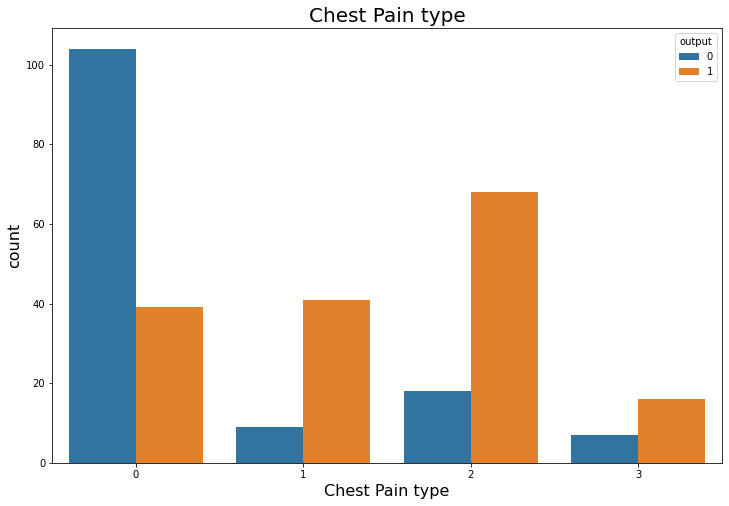

In [11]:
plt.figure(figsize=(12,8))
sns.countplot('cp',hue='output',data=df)
plt.title("Chest Pain type",size=20)
plt.xlabel("Chest Pain type",size=16)
plt.ylabel("count",size=16)

<p style="color:#E46161;
          font-size:22px;"> -> peoble who suffer from non-anginal pain have more chance of heart attack </p>



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
fasting blood sugar
</p>
</div>


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

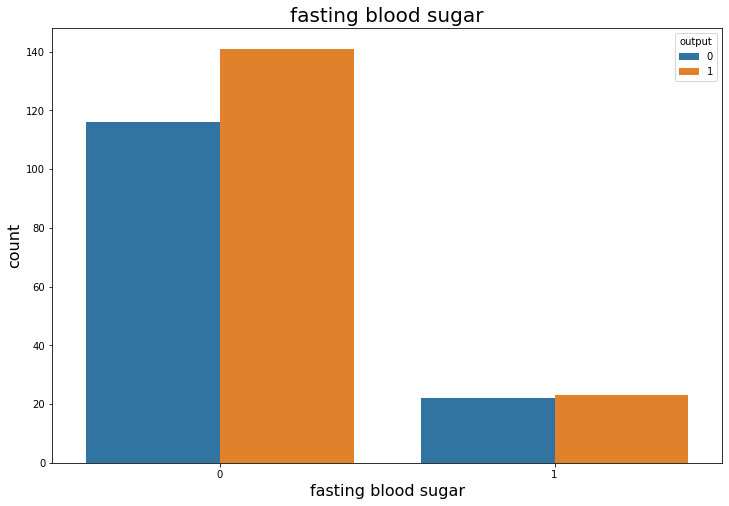

In [12]:
plt.figure(figsize=(12,8))
sns.countplot('fbs',hue='output',data=df)
plt.title("fasting blood sugar",size=20)
plt.xlabel("fasting blood sugar",size=16)
plt.ylabel("count",size=16)

<p style="color:#E46161;
          font-size:22px;"> ->  peoble have less than 120 in fasting blood sugar have more chance of heart attack </p>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 resting electrocardiographic results
</p>
</div>


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

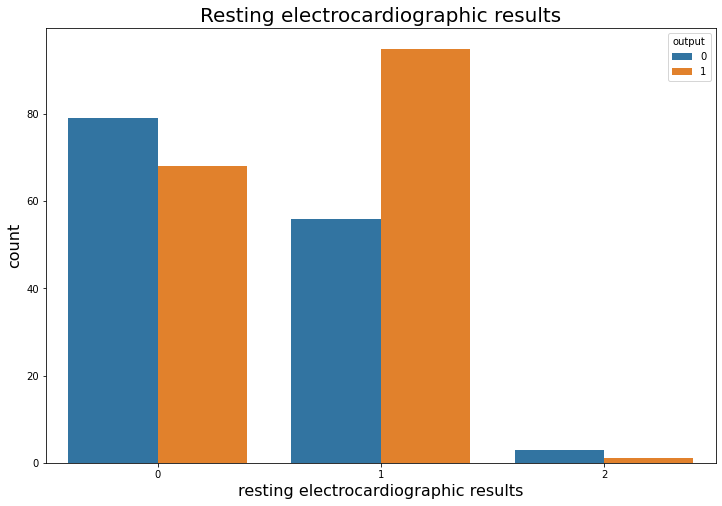

In [13]:
plt.figure(figsize=(12,8))
sns.countplot('restecg',hue='output',data=df)
plt.title("Resting electrocardiographic results",size=20)
plt.xlabel("resting electrocardiographic results",size=16)
plt.ylabel("count",size=16)

<p style="color:#E46161;
          font-size:22px;"> -> peoble  having ST-T wave abnormality have more chance of heart attack</p>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 number of major vessels
</p>
</div>


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

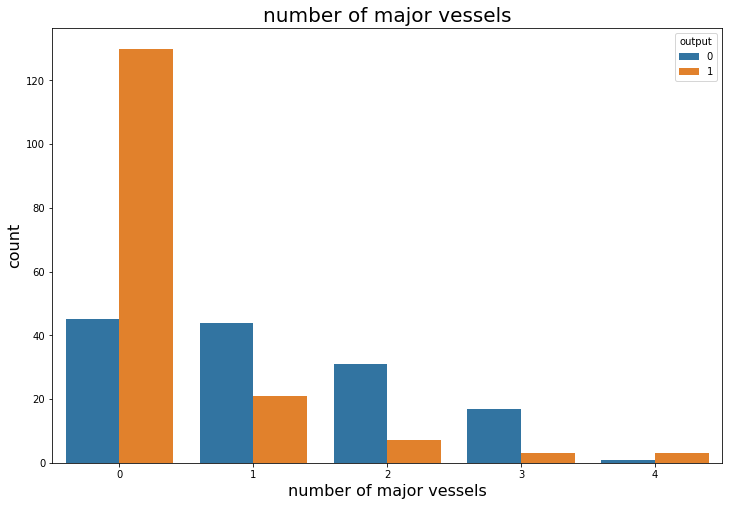

In [14]:
plt.figure(figsize=(12,8))
sns.countplot('caa',hue='output',data=df)
plt.title("number of major vessels",size=20)
plt.xlabel("number of major vessels",size=16)
plt.ylabel("count",size=16)

<p style="color:#E46161;
          font-size:22px;"> -> peoble having zero of major vessels  have more chance of heart attack </p>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
 exercise induced angina
</p>
</div>


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

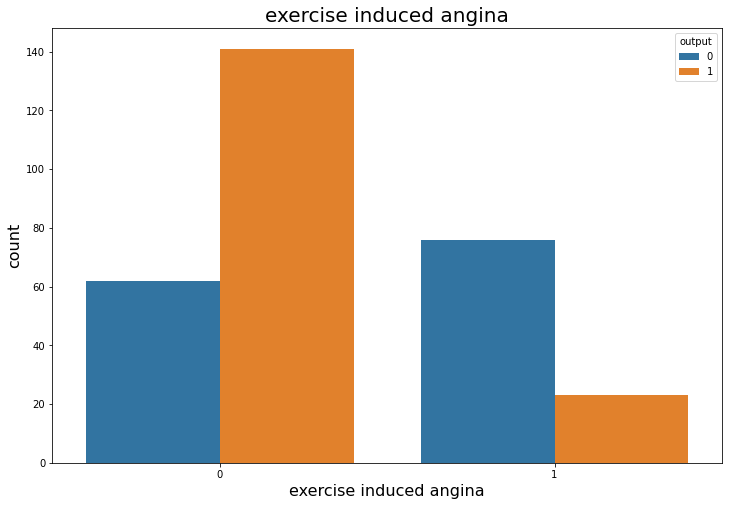

In [15]:
plt.figure(figsize=(12,8))
sns.countplot('exng',hue='output',data=df)
plt.title("exercise induced angina",size=20)
plt.xlabel("exercise induced angina",size=16)
plt.ylabel("count",size=16)

<p style="color:#E46161;
          font-size:22px;"> -> peoble with no exercise induced angina have more chance of heart attack  </p>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Gendre
</p>
</div>
 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

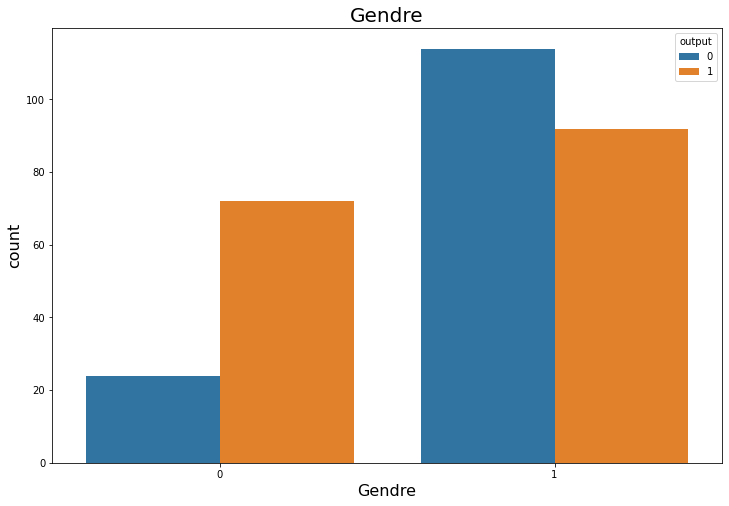

In [16]:
plt.figure(figsize=(12,8))
sns.countplot('sex',hue='output',data=df)
plt.title("Gendre",size=20)
plt.xlabel("Gendre",size=16)
plt.ylabel("count",size=16)

<p style="color:#E46161;
          font-size:22px;"> -> the chance of heart attack is more between men  </p>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Age
</p>
</div>


Text(0, 0.5, 'count')

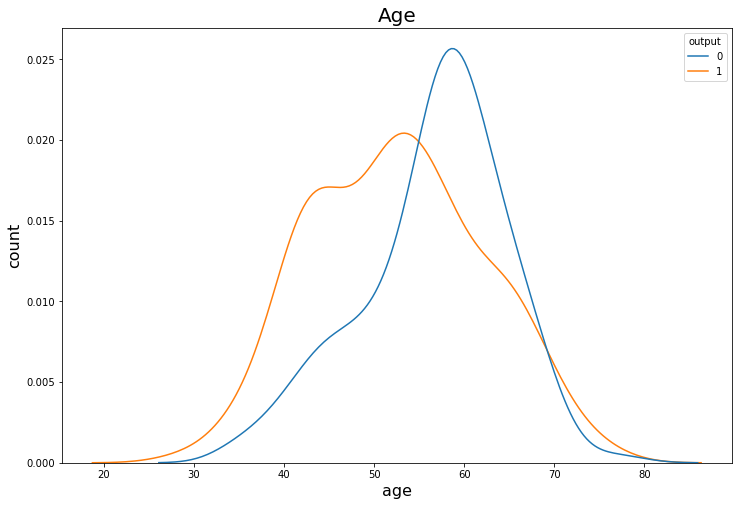

In [17]:
plt.figure(figsize=(12,8))
sns.kdeplot('age',hue='output',data=df)
plt.title("Age",size=20)
plt.xlabel("age",size=16)
plt.ylabel("count",size=16)

<p style="color:#E46161;
          font-size:22px;"> -> the chance of heart attack increase from age 30 until age 65 </p>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
resting blood pressure
</p>
</div>


Text(0, 0.5, 'count')

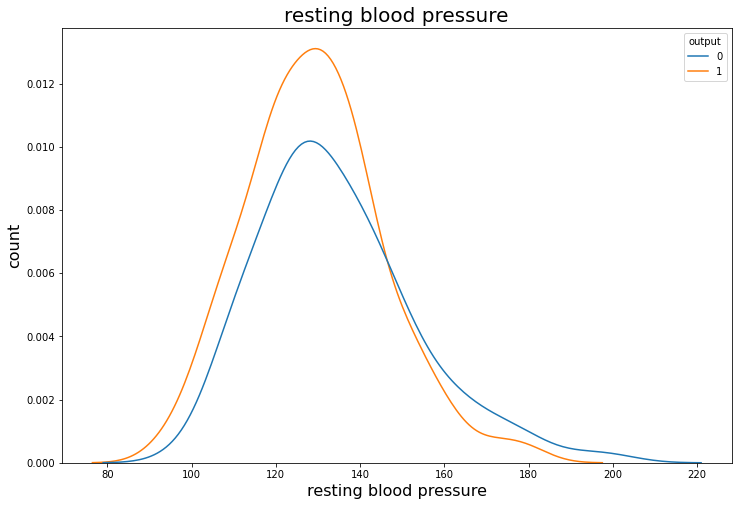

In [18]:
plt.figure(figsize=(12,8))
sns.kdeplot('trtbps',hue='output',data=df)
plt.title("resting blood pressure",size=20)
plt.xlabel("resting blood pressure",size=16)
plt.ylabel("count",size=16)

<p style="color:#E46161;
          font-size:22px;"> -> the chance of heart attack is more when the resting blood pressure approximately between 100-150 </p>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
cholestoral in mg/dl fetched via BMI sensor
</p>
</div>


Text(0, 0.5, 'count')

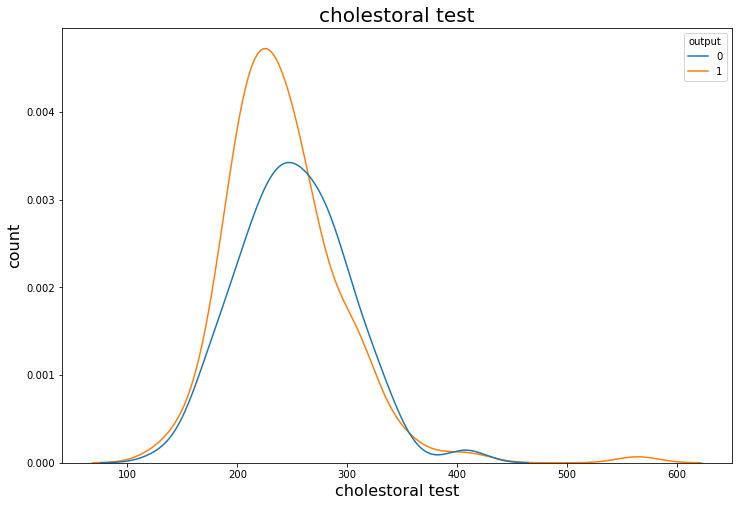

In [19]:
plt.figure(figsize=(12,8))
sns.kdeplot('chol',hue='output',data=df)
plt.title("cholestoral test",size=20)
plt.xlabel("cholestoral test",size=16)
plt.ylabel("count",size=16)

<p style="color:#E46161;
          font-size:22px;"> -> the chance of heart attack is more when cholestoral approximately between 150-300 </p>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#7DC5B6;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Data correlation
</p>
</div>


<AxesSubplot:>

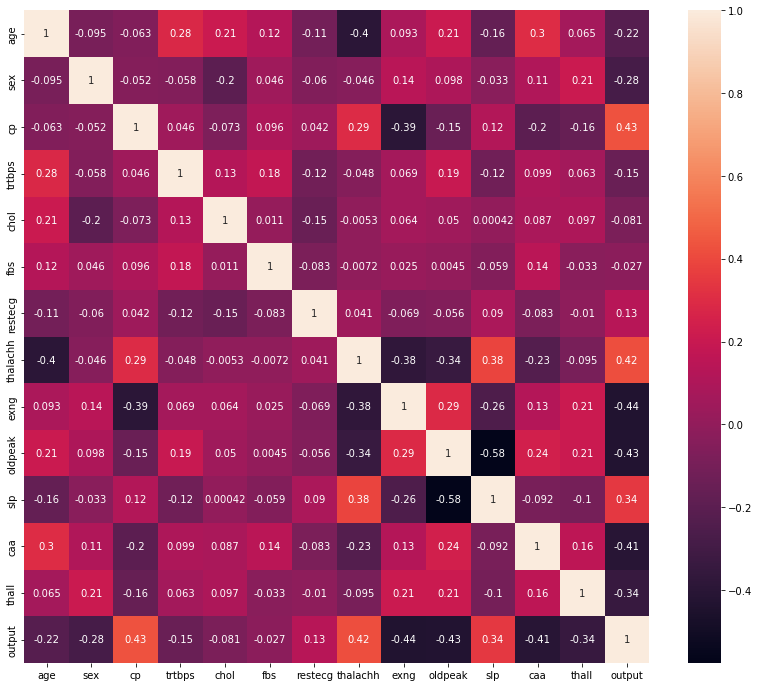

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)

------------

<p style="padding: 10px;
          color:white;
          background-color:#045E6D;
          font-size:200%;
          border-radius:5px;
          font-family:Verdana;
          display:fill;
          letter-spacing:0.5px;" >
                       Final report
</p>


<ul style= "color:#137667;
            font-size:22px;">
    <li> Peoble who suffer from non-anginal pain have more chance of heart attack</li>
    <li> Peoble have less than 120 in fasting blood sugar have more chance of heart attack</li>
    <li> Peoble having ST-T wave abnormality have more chance of heart attack</li>
    <li> Peoble having zero of major vessels have more chance of heart attack</li>
    <li> Peoble with no exercise induced angina have more chance of heart attack</li>
    <li> The chance of heart attack is more between men</li>
    <li> The chance of heart attack increase from age 30 until age 65</li>
    <li> The chance of heart attack is more when the resting blood pressure approximately between 100-150</li>
    <li>  The chance of heart attack is more when cholestoral approximately between 150-300</li>
</ul>


